In [ ]:
!pip install pyLDAvis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

#changing the working directory
# %cd /content/gdrive/My Drive/Dataset(Colab)
#Check the present working directory using pwd command

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing modules
import pandas as pd
import os
# Read data into papers
papers = pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/papers1.csv')
# Print head
papers.head()
# papers.info()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
# Load the regular expression library
import re
# Remove punctuation

papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\\.!?]', '', x))

# print(papers['paper_text_processed'])


# # Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# # Print out the first rows of papers
papers['paper_text_processed'].head()



0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

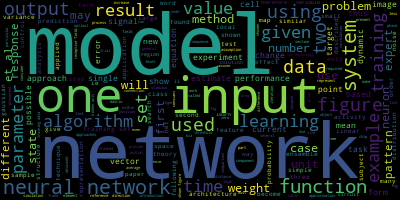

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# print(long_string[0:30])
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=200, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def remove_stopwords(texts):
  # dirs=[]
  # for doc in texts:
  #   birs=[]
  #   for word in simple_preprocess(str(doc)):
  #     if word not in stop_words:
  #       birs.append(word)
  #   final=" ".join(birs)
  #   dirs.append(final)
  # return dirs
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
# print(data[1]) # contains all the rows in a list as an individual element
# print(papers['paper_text_processed'])

data_words = list(sent_to_words(data)) #it saves a sentence as a list by treating every word as an alement of the list

# print((data_words[1]))
# remove stop words
# data_words = remove_stopwords(data_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
print(id2word)
# Create Corpus
texts = data_words
print(texts)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

Dictionary(11341 unique tokens: ['abolish', 'about', 'above', 'abstract', 'accelerate']...)
[['self', 'organization', 'of', 'associative', 'database', 'and', 'its', 'applications', 'hisashi', 'suzuki', 'and', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'an', 'efficient', 'method', 'of', 'self', 'organizing', 'associative', 'databases', 'is', 'proposed', 'together', 'with', 'applications', 'to', 'robot', 'eyesight', 'systems', 'the', 'proposed', 'databases', 'can', 'associate', 'any', 'input', 'with', 'some', 'output', 'in', 'the', 'first', 'half', 'part', 'of', 'discussion', 'an', 'algorithm', 'of', 'self', 'organization', 'is', 'proposed', 'from', 'an', 'aspect', 'of', 'hardware', 'it', 'produces', 'new', 'style', 'of', 'neural', 'network', 'in', 'the', 'latter', 'half', 'part', 'an', 'applicability', 'to', 'handwritten', 'letter', 'recognition', 'and', 'that', 'to', 'an', 'autonomous', 'mobile', 'robot', 'system', 'are', 'demonstrated', 'intr

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"the" + 0.023*"of" + 0.020*"to" + 0.019*"in" + 0.017*"and" + '
  '0.013*"is" + 0.011*"for" + 0.007*"on" + 0.006*"this" + 0.006*"are"'),
 (1,
  '0.041*"the" + 0.030*"of" + 0.017*"and" + 0.017*"in" + 0.015*"is" + '
  '0.013*"to" + 0.012*"for" + 0.008*"be" + 0.007*"that" + 0.007*"are"'),
 (2,
  '0.087*"the" + 0.048*"of" + 0.024*"and" + 0.020*"is" + 0.019*"in" + '
  '0.018*"to" + 0.012*"for" + 0.009*"are" + 0.009*"by" + 0.007*"that"'),
 (3,
  '0.078*"the" + 0.037*"of" + 0.023*"and" + 0.022*"to" + 0.019*"in" + '
  '0.013*"for" + 0.013*"is" + 0.008*"that" + 0.007*"with" + 0.007*"be"'),
 (4,
  '0.086*"the" + 0.031*"of" + 0.026*"and" + 0.023*"to" + 0.019*"in" + '
  '0.015*"for" + 0.015*"is" + 0.009*"that" + 0.009*"we" + 0.008*"this"'),
 (5,
  '0.054*"the" + 0.040*"of" + 0.027*"is" + 0.022*"in" + 0.021*"and" + '
  '0.021*"to" + 0.008*"by" + 0.008*"as" + 0.007*"that" + 0.006*"for"'),
 (6,
  '0.062*"the" + 0.038*"of" + 0.025*"and" + 0.023*"in" + 0.019*"is" + '
  '0.017*"to" + 0.014*

In [ ]:
import pyLDAvis
import pickle 
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.007742  0.013855       1        1  35.571989
4     -0.004132  0.011823       2        1  34.516339
9      0.003612  0.012578       3        1  15.787563
3     -0.011116  0.004970       4        1  10.826336
6     -0.003724  0.001315       5        1   2.732857
5      0.007133  0.001535       6        1   0.503062
8      0.002943 -0.000718       7        1   0.050766
7     -0.002874 -0.012512       8        1   0.003696
1      0.010440 -0.013650       9        1   0.003696
0      0.005459 -0.019196      10        1   0.003696, topic_info=       Term          Freq         Total Category  logprob  loglift
847     the  15115.000000  15115.000000  Default  30.0000  30.0000
568      of   7186.000000   7186.000000  Default  29.0000  29.0000
34      and   4451.000000   4451.000000  Default  28.0000  28.0000
860      to   3775.000000   3775.000000  Default  27.0000  27.0000
403      in   3810.000000   3810.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
111     can      0.018803    751.001142  Topic10  -5.8904  -0.3894
922      we      0.022504   1268.328723  Topic10  -5.7108  -0.7338
857    time      0.014885    452.753346  Topic10  -6.1241  -0.1170
70       at      0.015263    581.675850  Topic10  -6.0990  -0.3425
540  neural      0.015541    704.004438  Topic10  -6.0810  -0.5153

[852 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
7         1  0.292892   accordingly
7         2  0.439339   accordingly
7         3  0.146446   accordingly
7         4  0.146446   accordingly
7340      1  0.206188  accumulation
...     ...       ...           ...
2953      1  0.206748         zemel
2953      2  0.620244         zemel
2953      3  0.206748         zemel
5251      1  0.222677        zoubin
5251      2  0.668032        zoubin

[1527 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 10, 4, 7, 6, 9, 8, 2, 1])

In [ ]:
# !pip install stopwordsiso
# import stopwordsiso as stopwords
# stop_words = stopwords.stopwords('ur')
# print(stop_words)